In [2]:
from datetime import datetime   # para transformar o texto "HH:MM" em horário
import numpy as np             # para facilitar cálculos (média, desvio)
import pandas as pd            # para ler o arquivo CSV
#from google.colab import files # para fazer upload no Google Colab
import matplotlib.pyplot as plt
from scipy.stats import norm


# 1) Upload do arquivo CSV
#    Esta linha abre uma janelinha para você escolher o arquivo "horarios_dormida.csv"
#files.upload()

# 2) Lê o arquivo CSV e guarda no dataframe "df"
df = pd.read_csv("horarios_dormida.csv", sep=";")

# 3) Pegamos apenas a coluna que tem o horário de acordar
#    .tolist() converte a coluna para uma lista comum do Python
#    (assim fica mais fácil manipular e percorrer com o "for")
dados = df["Horario_Gerado"].tolist()

# 4) Agora vamos converter cada horário do formato texto "HH:MM"
#    para um número inteiro representando QUANTOS MINUTOS se passaram desde 00:00
tempos_min = []
for h in dados:
    t = datetime.strptime(h, "%H:%M")       # exemplo: transforma "07:30" em um horário de verdade
    minutos = t.hour * 60 + t.minute        # exemplo: 7*60 + 30 = 450 minutos
    tempos_min.append(minutos)              # adiciona à lista

# 5) Convertemos a lista em array NumPy
#    porque o NumPy permite fazer conta direto (ex: média) sem loop manual
tempos_min = np.array(tempos_min)

# 6) Calculando a média dos horários (em MINUTOS após meia-noite)
media = tempos_min.mean()

# 7) Convertendo a média para HH:MM (sem criar função, de forma didática)
media_horas = int(media // 60)       # pega só o número de horas
media_minutos = int(media % 60)      # pega o resto (os minutos)

# 8) Agora vamos calcular o DESVIO PADRÃO dos horários
#    O desvio mostra o quanto os horários variam em torno da média.
desvio = tempos_min.std(ddof=1)

# 9) Definindo os percentis que queremos estudar:
#    90% , 50% , 30% , 10%
probs = np.array([0.90, 0.50, 0.30, 0.10])

# 10) Convertendo esses percentis em horários (em minutos) usando a Normal ajustada
quantis_min = norm.ppf(probs, loc=media, scale=desvio)

# 11) Criamos etiquetas para imprimir no gráfico
rotulos = ["90%", "50%", "30%", "10%"]

# 12) Função simples para converter minutos em HH:MM (apenas para rótulos do gráfico)
def minutos_para_hhmm(m):
    h = int(m // 60)
    mm = int(m % 60)
    return f"{h:02d}:{mm:02d}"



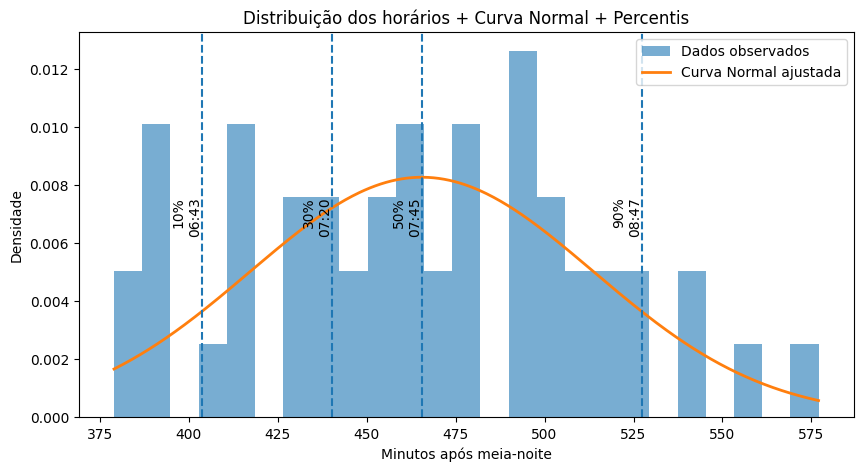

In [3]:

# ===========================================================
# GRÁFICO FINAL: curva Normal + linhas verticais dos percentis
# ===========================================================
# (coloque esta célula logo depois da célula que calcula
#  os percentis e faz os prints interpretando)

plt.figure(figsize=(10,5))  # cria uma figura com tamanho maior para ficar mais legível

# 1) Histograma dos horários reais observados
#    density=True faz o histograma virar uma "função de densidade"
#    (assim ele fica comparável com a curva Normal)
plt.hist(tempos_min, bins=25, density=True, alpha=0.6, label="Dados observados")

# 2) Construção da curva Normal ajustada
#    Criamos um eixo contínuo (x) e passamos a Normal em cima dele
x = np.linspace(tempos_min.min(), tempos_min.max(), 400)  # 400 pontos do menor ao maior horário
pdf = norm.pdf(x, loc=media, scale=desvio)                 # calcula a densidade f(x)
plt.plot(x, pdf, linewidth=2, label="Curva Normal ajustada")  # desenha a curva

# 3) Desenho das linhas verticais dos percentis (90%, 50%, 30%, 10%)
#    Isso ajuda a visualizar melhor onde ficam os limites estatísticos
for rot, q, p in zip(rotulos, quantis_min, probs):
    pct = int(round(p * 100))     # converte 0.90 para 90, etc
    plt.axvline(q, linestyle="--", linewidth=1.5)  # linha tracejada na posição do percentil
    # anotação visual com HH:MM
    plt.text(q, pdf.max()*0.92, f"{rot}\n{minutos_para_hhmm(q)}",
             rotation=90, va="top", ha="right")

# 4) Configurações estéticas
plt.title("Distribuição dos horários + Curva Normal + Percentis")  # título do gráfico
plt.xlabel("Minutos após meia-noite")  # eixo x (em minutos)
plt.ylabel("Densidade")                # eixo y (densidade da distribuição)
plt.legend()                           # mostra a legenda
plt.show()                             # exibe o gráfico

In [4]:
# ===============================================================
# CÁLCULO E IMPRESSÃO DOS PERCENTIS COM EXPLICAÇÃO PASSO A PASSO
# (Assume que já existem: tempos_min, media e a função minutos_para_hhmm)
# ===============================================================

# 1) DESVIO PADRÃO DA AMOSTRA
#    - Mede o "espalhamento" dos horários em torno da média.
#    - Quanto maior o desvio, mais os horários variam de um dia para o outro.
#    - ddof=1 significa "desvio AMOSTRAL" (divide por n-1), que é o usado em estatística básica.
desvio = tempos_min.std(ddof=1)

# 2) PERCENTIS QUE VAMOS RELATAR
#    - Percentil é um "ponto de corte".
#    - Ex.: 90% significa: "em 90% dos dias, o horário foi ATÉ esse valor".
#    - Aqui usamos 90% (alto), 50% (mediana), 30% e 10% (baixos, horários bem cedo).
probs = np.array([0.90, 0.50, 0.30, 0.10])

# 3) CONVERTER ESSES PERCENTIS EM HORÁRIOS (EM MINUTOS) ASSUMINDO DISTRIBUIÇÃO NORMAL
#    - norm.ppf() retorna o valor x tal que P(T <= x) = p para T ~ Normal(media, desvio^2).
#    - Em palavras simples: "qual é o horário-limite para garantir p% dos casos?"
#    - O resultado sai em MINUTOS após a meia-noite (vamos converter para HH:MM ao imprimir).
quantis_min = norm.ppf(probs, loc=media, scale=desvio)

# 4) IMPRIMIR OS RESULTADOS COM UMA FRASE CLARA PARA CADA PERCENTIL
#    - rotulos: só para exibir "90%", "50%", etc.
#    - pct: transforma 0.90 → 90 (com arredondamento correto).
#    - resto: 100 - pct (serve para dizer quantos % ficam "depois" desse horário).
#    - Se p < 0.5 (percentil baixo), significa um horário cedo; então 100-p% dos dias ele acorda DEPOIS.
#    - Se p >= 0.5 (percentil alto), significa um horário tardio; então só (100-p)% ele passa desse horário.
rotulos = ["90%", "50%", "30%", "10%"]

for rot, q, p in zip(rotulos, quantis_min, probs):
    horario = minutos_para_hhmm(q)          # converte minutos → "HH:MM" para leitura humana
    pct = int(round(p * 100))               # ex.: 0.90 → 90 (evita coisas como 89.999 → 90)
    resto = 100 - pct                       # ex.: 100 - 90 → 10

    # Texto complementar: muda ligeiramente a frase para ficar natural em cada caso
    if p < 0.5:
        # Percentis baixos: horários mais CEDO
        complemento = f"(em {resto}% das vezes ele acorda DEPOIS disso)"
    else:
        # Percentis altos: horários mais TARDIOS
        complemento = f"(e só em {resto}% dos dias ele acorda DEPOIS disso)"

    # Frase final completa, didática e direta
    print(f"Em {rot} das vezes, ele acorda até: {horario} (≈ {q:.2f} min) {complemento}")


Em 90% das vezes, ele acorda até: 08:47 (≈ 527.37 min) (e só em 10% dos dias ele acorda DEPOIS disso)
Em 50% das vezes, ele acorda até: 07:45 (≈ 465.50 min) (e só em 50% dos dias ele acorda DEPOIS disso)
Em 30% das vezes, ele acorda até: 07:20 (≈ 440.18 min) (em 70% das vezes ele acorda DEPOIS disso)
Em 10% das vezes, ele acorda até: 06:43 (≈ 403.63 min) (em 90% das vezes ele acorda DEPOIS disso)
